In [1]:
import pandas as pd

df = pd.read_csv("/kaggle/input/birdclef-2025/train.csv")
freq_table = df["primary_label"].value_counts()
print(freq_table.head(20)) 


primary_label
grekis     990
compau     808
trokin     787
roahaw     709
banana     610
whtdov     572
socfly1    543
yeofly1    525
bobfly1    514
wbwwre1    499
soulap1    487
sobtyr1    478
trsowl     470
laufal1    467
strcuc1    431
bbwduc     424
saffin     419
amekes     409
tropar     397
compot1    383
Name: count, dtype: int64


In [2]:
top10 = ['grekis', 'compau', 'trokin', 'roahaw', 'banana', 'whtdov', 'socfly1', 'yeofly1', 'bobfly1', 'wbwwre1']

# Positive = grekis
pos_df = df[df['primary_label'] == 'grekis'].copy()
pos_df['label'] = 1

# Negative = rest of top 10 (excluding grekis)
neg_df = df[df['primary_label'].isin(top10) & (df['primary_label'] != 'grekis')].copy()
neg_df['label'] = 0

from sklearn.utils import resample

# Downsample negatives to match positives
neg_df_balanced = resample(neg_df, 
                           replace=False, 
                           n_samples=len(pos_df), 
                           random_state=42)

combined_df = pd.concat([pos_df, neg_df_balanced]).sample(frac=1, random_state=42)

# Combine
combined_df = pd.concat([pos_df, neg_df], ignore_index=True).sample(frac=1, random_state=42)

# Preview
combined_df[['primary_label', 'filename', 'label']].head()

,primary_label,filename,label
2481,compau,compau/XC811731.ogg,0
4700,trokin,trokin/iNat1287626.ogg,0
1504,banana,banana/iNat33120.ogg,0
2476,compau,compau/XC799779.ogg,0
2627,compau,compau/iNat185443.ogg,0


In [3]:
neg_df = df[df['primary_label'].isin(top10) & (df['primary_label'] != 'grekis')].copy()
neg_df['label'] = 0

from sklearn.utils import resample

neg_df_balanced = resample(neg_df, 
                           replace=False, 
                           n_samples=len(pos_df), 
                           random_state=42)

combined_df = pd.concat([pos_df, neg_df_balanced]).sample(frac=1, random_state=42)
combined_df

,primary_label,secondary_labels,type,filename,collection,rating,url,latitude,longitude,scientific_name,common_name,author,license,label
1884,banana,[''],['song'],banana/XC338406.ogg,XC,4.0,https://xeno-canto.org/338406,9.8320,-83.5639,Coereba flaveola,Bananaquit,Mary Beth Stowe,cc-by-nc-sa 4.0,0
10468,grekis,[''],['song'],grekis/XC194634.ogg,XC,3.0,https://xeno-canto.org/194634,-34.7966,-58.2760,Pitangus sulphuratus,Great Kiskadee,Diego Caiafa,cc-by-nc-sa 4.0,1
10763,grekis,[''],['song'],grekis/XC625529.ogg,XC,5.0,https://xeno-canto.org/625529,1.4898,-75.6801,Pitangus sulphuratus,Great Kiskadee,Mauricio Cuellar Ramirez (@Birding.travel),cc-by-nc-sa 4.0,1
5002,bobfly1,[''],[''],bobfly1/iNat354136.ogg,iNat,0.0,https://static.inaturalist.org/sounds/354136.wav,-0.5244,-76.3949,Megarynchus pitangua,Boat-billed Flycatcher,Unknown,cc-by-nc 4.0,0
8085,compau,[''],[''],compau/iNat890206.ogg,iNat,0.0,https://static.inaturalist.org/sounds/890206.m4a,25.6907,-100.2191,Nyctidromus albicollis,Common Pauraque,David Hurtado,cc-0 4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25617,whtdov,[''],"['aberrant', 'song']",whtdov/XC661045.ogg,XC,3.0,https://xeno-canto.org/661045,11.4947,-69.5128,Leptotila verreauxi,White-tipped Dove,Francisco contreras,cc-by-nc-sa 4.0,0
27715,yeofly1,[''],['song'],yeofly1/XC283318.ogg,XC,5.0,https://xeno-canto.org/283318,-14.3834,-40.1001,Tolmomyias sulphurescens,Yellow-olive Flycatcher,Jeremy Minns,cc-by-nc-sa 4.0,0
11272,grekis,[''],[''],grekis/iNat675556.ogg,iNat,0.0,https://static.inaturalist.org/sounds/675556.m4a,6.2406,-75.5021,Pitangus sulphuratus,Great Kiskadee,Unknown,cc-by-nc 4.0,1
24831,wbwwre1,[''],[''],wbwwre1/iNat744975.ogg,iNat,0.0,https://static.inaturalist.org/sounds/744975.wav,21.3965,-98.9957,Henicorhina leucosticta,White-breasted Wood-Wren,Salvador Cabrera,cc-by-nc 4.0,0


In [4]:
import numpy as np
import librosa

def extract_binary_features(filepath, sr=32000, n_fft=1024, hop_length=512, percentile=85):
    """
    Converts an audio file into a 3200-dim binary frequency-bin vector using adaptive thresholding.
    
    Args:
        filepath (str): Full path to the audio file
        sr (int): Sampling rate
        n_fft (int): FFT window size
        hop_length (int): Number of samples between frames
        percentile (float): Percentile threshold for activity in a frequency bin (0–100)

    Returns:
        np.ndarray: Binary vector of shape (3200,)
    """
    # Load audio
    y, sr_actual = librosa.load(filepath, sr=sr)
    
    # Compute STFT (complex)
    S = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    
    # Power and convert to decibels
    S_power = np.abs(S) ** 2
    S_db = librosa.power_to_db(S_power, ref=np.max)

    # Frequency values
    freqs = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

    # Frequency binning: 0 to 16000 Hz, in 5 Hz intervals → 3200 bins
    bin_edges = np.linspace(0, 16000, 3201)
    binary_vector = np.zeros(3200, dtype=int)

    # Compute threshold based on global energy distribution
    energy_per_freq = S_db.max(axis=1)  # Max across time for each frequency
    adaptive_threshold = np.percentile(energy_per_freq, percentile)

    # Assign 1s where max energy in bin > threshold
    for i in range(3200):
        f_start = bin_edges[i]
        f_end = bin_edges[i+1]
        bin_mask = (freqs >= f_start) & (freqs < f_end)
        
        if np.any(bin_mask):
            max_energy = np.max(energy_per_freq[bin_mask])
            if max_energy > adaptive_threshold:
                binary_vector[i] = 1

    return binary_vector

In [5]:
path = "/kaggle/input/birdclef-2025/train_audio/" + combined_df.iloc[0]["filename"]
vec = extract_binary_features(path)
print(vec.shape) 
print(vec.sum()) 

(3200,)
77


# Updated Binary Vector by Chunking the Audio files and Aggregating them using Median

In [6]:
import os
import numpy as np
import librosa
import soundfile as sf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from tqdm import tqdm

# Settings
thresholds_to_try = np.linspace(70, 90, 10)  # 10 thresholds
n_splits = 5
AUDIO_BASE = "/kaggle/input/birdclef-2025/train_audio/"
N_FILES = 100  
results = {}

def extract_binary_features(path, percentile=85):
    y, sr = librosa.load(path, sr=32000)
    S = librosa.stft(y, n_fft=1024, hop_length=512)
    S_power = np.abs(S) ** 2
    S_db = librosa.power_to_db(S_power, ref=np.max)
    freqs = librosa.fft_frequencies(sr=sr, n_fft=1024)
    bin_edges = np.linspace(0, 16000, 3201)
    binary_vector = np.zeros(3200, dtype=int)
    energy_per_freq = S_db.max(axis=1)
    adaptive_threshold = np.percentile(energy_per_freq, percentile)

    for j in range(3200):
        f_start = bin_edges[j]
        f_end = bin_edges[j+1]
        bin_mask = (freqs >= f_start) & (freqs < f_end)
        if np.any(bin_mask):
            max_energy = np.max(energy_per_freq[bin_mask])
            if max_energy > adaptive_threshold:
                binary_vector[j] = 1

    return binary_vector


# Implemented Threshold Tuning for Optimised Threshold


🔵 Threshold = 70.0%


Extracting with 70.0: 100%|██████████| 100/100 [00:09<00:00, 10.82it/s]


✅ Average F1 @ 70.0% = 0.6686

🔵 Threshold = 72.2%


Extracting with 72.2: 100%|██████████| 100/100 [00:08<00:00, 12.47it/s]


✅ Average F1 @ 72.2% = 0.6238

🔵 Threshold = 74.4%


Extracting with 74.4: 100%|██████████| 100/100 [00:08<00:00, 12.47it/s]


✅ Average F1 @ 74.4% = 0.7189

🔵 Threshold = 76.7%


Extracting with 76.7: 100%|██████████| 100/100 [00:07<00:00, 12.56it/s]


✅ Average F1 @ 76.7% = 0.7420

🔵 Threshold = 78.9%


Extracting with 78.9: 100%|██████████| 100/100 [00:07<00:00, 12.56it/s]


✅ Average F1 @ 78.9% = 0.6548

🔵 Threshold = 81.1%


Extracting with 81.1: 100%|██████████| 100/100 [00:08<00:00, 12.39it/s]


✅ Average F1 @ 81.1% = 0.7382

🔵 Threshold = 83.3%


Extracting with 83.3: 100%|██████████| 100/100 [00:08<00:00, 12.11it/s]


✅ Average F1 @ 83.3% = 0.7308

🔵 Threshold = 85.6%


Extracting with 85.6: 100%|██████████| 100/100 [00:07<00:00, 12.63it/s]


✅ Average F1 @ 85.6% = 0.7064

🔵 Threshold = 87.8%


Extracting with 87.8: 100%|██████████| 100/100 [00:08<00:00, 12.29it/s]


✅ Average F1 @ 87.8% = 0.7153

🔵 Threshold = 90.0%


Extracting with 90.0: 100%|██████████| 100/100 [00:07<00:00, 12.84it/s]


✅ Average F1 @ 90.0% = 0.7000

📊 Final Results:
Threshold 70.0% -> Avg F1: 0.6686
Threshold 72.2% -> Avg F1: 0.6238
Threshold 74.4% -> Avg F1: 0.7189
Threshold 76.7% -> Avg F1: 0.7420
Threshold 78.9% -> Avg F1: 0.6548
Threshold 81.1% -> Avg F1: 0.7382
Threshold 83.3% -> Avg F1: 0.7308
Threshold 85.6% -> Avg F1: 0.7064
Threshold 87.8% -> Avg F1: 0.7153
Threshold 90.0% -> Avg F1: 0.7000


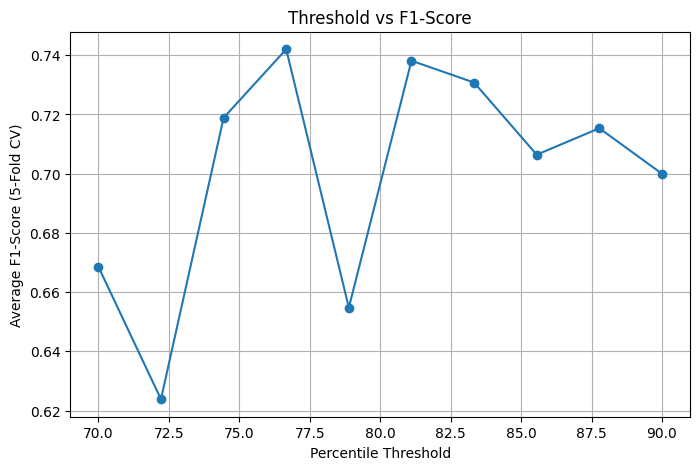

In [7]:
# Main Loop
for thresh in thresholds_to_try:
    print(f"\n🔵 Threshold = {thresh:.1f}%")

    X = []
    y = []

    for i in tqdm(range(N_FILES), desc=f"Extracting with {thresh:.1f}"):
        path = AUDIO_BASE + combined_df.iloc[i]["filename"]

        try:
            vec = extract_binary_features(path, percentile=thresh)
            X.append(vec)
            y.append(combined_df.iloc[i]['label'])
        except Exception as e:
            print(f"❌ Failed for file {i}: {e}")

    X = np.stack(X)
    y = np.array(y)

    # 5-Fold Cross-Validation
    f1_scores = []

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = XGBClassifier(
            n_estimators=500,
            scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42
        )

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_pred)
        f1_scores.append(f1)

    avg_f1 = np.mean(f1_scores)
    print(f"✅ Average F1 @ {thresh:.1f}% = {avg_f1:.4f}")

    results[thresh] = avg_f1

# Summary
print("\n📊 Final Results:")
for k, v in results.items():
    print(f"Threshold {k:.1f}% -> Avg F1: {v:.4f}")

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.xlabel('Percentile Threshold')
plt.ylabel('Average F1-Score (5-Fold CV)')
plt.title('Threshold vs F1-Score')
plt.grid(True)
plt.show()

In [8]:
path = "/kaggle/input/birdclef-2025/train_audio/" + combined_df.iloc[0]["filename"]
vec = extract_binary_features(path, percentile=76.7)
print(vec.shape) 
print(vec.sum()) 

(3200,)
120


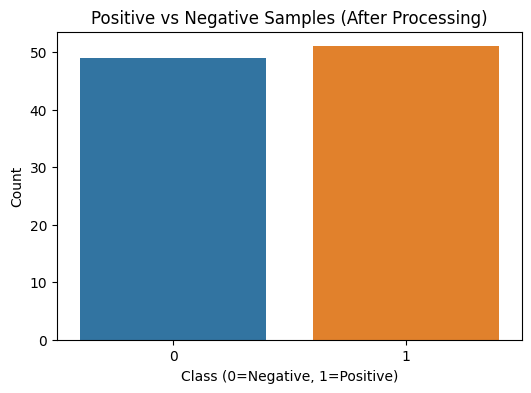

In [9]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Positive vs Negative Samples (After Processing)')
plt.xlabel('Class (0=Negative, 1=Positive)')
plt.ylabel('Count')
plt.show()

# Implementing Optimised Threshold for Training Data and Model Training with Cross Val

In [10]:
import os
import numpy as np
import soundfile as sf
import librosa
from tqdm import tqdm

# Storage
X = []
y = []

# Full base path to audio files
AUDIO_BASE = "/kaggle/input/birdclef-2025/train_audio/"

for _, row in tqdm(combined_df.iterrows(), total=len(combined_df)):
    full_path = os.path.join(AUDIO_BASE, row['filename'])

    try:
        # Load audio
        y_raw, sr = sf.read(full_path)
        samples_per_chunk = sr * 5  # 5 seconds
        num_chunks = len(y_raw) // samples_per_chunk

        if num_chunks == 0:
            continue  # skip if too short

        # Extract binary vectors per chunk
        chunk_features = []

        for i in range(num_chunks):
            start = i * samples_per_chunk
            end = start + samples_per_chunk
            chunk = y_raw[start:end]

            # Extract features for chunk
            S = librosa.stft(chunk, n_fft=1024, hop_length=512)
            S_power = np.abs(S) ** 2
            S_db = librosa.power_to_db(S_power, ref=np.max)
            freqs = librosa.fft_frequencies(sr=sr, n_fft=1024)
            bin_edges = np.linspace(0, 16000, 3201)
            binary_vector = np.zeros(3200, dtype=int)
            energy_per_freq = S_db.max(axis=1)
            adaptive_threshold = np.percentile(energy_per_freq, 85)

            for j in range(3200):
                f_start = bin_edges[j]
                f_end = bin_edges[j+1]
                bin_mask = (freqs >= f_start) & (freqs < f_end)
                if np.any(bin_mask):
                    max_energy = np.max(energy_per_freq[bin_mask])
                    if max_energy > adaptive_threshold:
                        binary_vector[j] = 1

            chunk_features.append(binary_vector)

        # Now aggregate across all chunks
        chunk_features = np.array(chunk_features)

        # median aggregation across chunks
        final_vector = np.median(chunk_features, axis=0)

        # binarize again (keep 0 or 1 only)
        final_vector = (final_vector > 0.5).astype(int)

        # Save final vector
        X.append(final_vector)
        y.append(row['label'])

    except Exception as e:
        print(f"❌ Failed for {row['filename']}: {e}")

100%|██████████| 1980/1980 [07:43<00:00,  4.28it/s] 


In [11]:
X = np.stack(X)
y = np.array(y)

print("✅ Final Feature Matrix shape:", X.shape)
print("✅ Final Labels shape:", y.shape)

✅ Final Feature Matrix shape: (1826, 3200)
✅ Final Labels shape: (1826,)


In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import numpy as np

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

f1_scores_rf = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\n🔵 Fold {fold+1}/{n_splits}")

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    clf_rf = RandomForestClassifier(
        n_estimators=500,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1  # use all cores
    )

    clf_rf.fit(X_train, y_train)
    y_pred_rf = clf_rf.predict(X_val)

    f1 = f1_score(y_val, y_pred_rf)
    print(f"✅ Fold {fold+1} F1-Score: {f1:.4f}")

    f1_scores_rf.append(f1)

    # (Optional) Print confusion matrix
    # print(confusion_matrix(y_val, y_pred_rf))

# Final average
avg_f1_rf = np.mean(f1_scores_rf)
print(f"\n📊 Average F1-Score across {n_splits} folds: {avg_f1_rf:.4f}")


🔵 Fold 1/5
✅ Fold 1 F1-Score: 0.7851

🔵 Fold 2/5
✅ Fold 2 F1-Score: 0.7562

🔵 Fold 3/5
✅ Fold 3 F1-Score: 0.7949

🔵 Fold 4/5
✅ Fold 4 F1-Score: 0.7789

🔵 Fold 5/5
✅ Fold 5 F1-Score: 0.7584

📊 Average F1-Score across 5 folds: 0.7747


In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import numpy as np

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

auc_scores_rf = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\n🔵 Fold {fold+1}/{n_splits}")

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    clf_rf = RandomForestClassifier(
        n_estimators=500,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1  # use all cores
    )

    clf_rf.fit(X_train, y_train)
    y_pred_rf = clf_rf.predict(X_val)

    roc_auc = roc_auc_score(y_val, y_pred_rf)
    print(f"✅ Fold {fold+1} AUC-Score: {roc_auc:.4f}")

    auc_scores_rf.append(f1)

    # (Optional) Print confusion matrix
    # print(confusion_matrix(y_val, y_pred_rf))

# Final average
avg_auc_rf = np.mean(auc_scores_rf)
print(f"\n📊 Average AUC-Score across {n_splits} folds: {avg_auc_rf:.4f}")


🔵 Fold 1/5
✅ Fold 1 AUC-Score: 0.7789

🔵 Fold 2/5
✅ Fold 2 AUC-Score: 0.7324

🔵 Fold 3/5
✅ Fold 3 AUC-Score: 0.7814

🔵 Fold 4/5
✅ Fold 4 AUC-Score: 0.7703

🔵 Fold 5/5
✅ Fold 5 AUC-Score: 0.7454

📊 Average AUC-Score across 5 folds: 0.7584


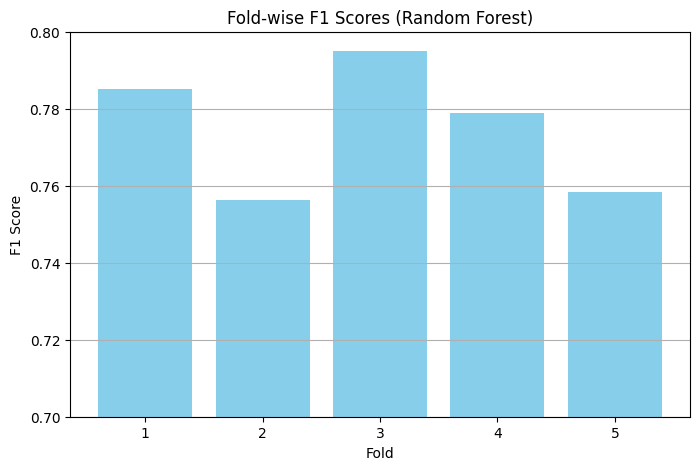

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(range(1, len(f1_scores_rf)+1), f1_scores_rf, color='skyblue')
plt.ylim(0.7,0.8)
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.title('Fold-wise F1 Scores (Random Forest)')
plt.grid(axis='y')
plt.show()

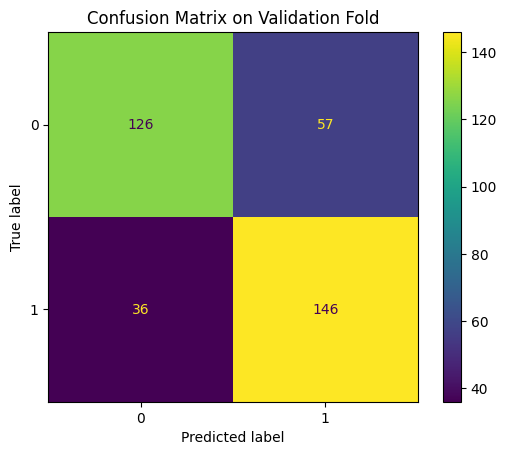

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix on Validation Fold")
plt.show()